# Intro to probability in python

This is my notebook for learning probability at MIT courseware [Introduction to Probability and Statistics](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/)


# Terminology
* **Experiment**: a repeatable procedure with well-defined possible outcomes. <br> 
For example, rolling a die 3 times, and recording the number on each roll.
* **Sample Space**: the set of all possible outcomes. 
* **Event**: a subset of the sample space
* **Probability Function**: a function giving the probability for each outcome
* **Probability Density**: a continuous distribution of probabilities
* **Random Variable**: a random numerical outcome
* **Probability**: Assuming that all outcomes are equally likely, probability of an event with respect to sample space is the number of desireable cases divided by the total number of cases in the sample space.


## Code for Probability

Here, let event $E$ and Sample Space as $\Omega$, and <br> $|E|$ and $|\Omega|$ as numbers of elements in Event and sample space, then 

$$ P(event) = \frac{|E \cap \Omega|}{|\Omega|}$$

In python this is expressed as 

In [18]:
from fractions import Fraction

def P(event, sample_space):
    # Note that numerator is a intersection of set event, and set sample space
    # when event includes a outcome that are not in sample space, we don't count that
    numerator = len(event & sample_space) 
    denominator = len(sample_space)
    return Fraction(numerator, denominator)


## Examples

Now Let's take a look at each concept above, using a simple example of 

### 1. rolling 1 fair die.
Here we'll think of Event of getting evene number after 1 roll.


In [19]:
sample_space = {1, 2, 3, 4, 5, 6}
event = {2, 4, 6}

# Probability is...
print(P(event, sample_space))

1/2


### 2. Roll 2 dies, and calculate the sum

* **Experiment**: 
    1. roll one die, and record the number. 
    2. Roll the other die, and record the number as well. 
    3. sum up the 2 numbers, and record it

Sample Space will be a set of combinations of numbers, first element from 1st die and second from 2nd die.

Now `D1` for sample space for dice 1, and `D2` for the same of dice 2. 
Sample space for the experiement will be a product of the 2 sets,
$$ D1 \times D2 = \{(d1, d2)|d1\in D1, d2\in D2\}$$

**Here is the all possible combinations of the two dies, all equally likely**

In [20]:
D1 = {1, 2, 3, 4, 5, 6}
D2 = {i+1 for i in range(6)}

sample = set()
# creating sample space by multiplying the two sets
for i in D1:
    for j in D2:
        print((i, j))
        sample.add((i, j))
        


(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)


**What about the sum of the two numbers though...??**

In [21]:
from pprint import pprint
# now we'll create a dictionary with values of the sum, and frequencies
dice_sum = {}
for s in sample:
    if sum(s) in dice_sum.keys():
        dice_sum[sum(s)].add(s)
    else:
        dice_sum[sum(s)] = {s}
print("Sum    Dies")
pprint(dice_sum)

## Now getting each probabilities...
print("\nSum   Probability")
dice_prob = {}
for k, v in sorted(dice_sum.items()):
    print(k, P(v, sample))
    dice_prob[k] = P(v, sample)

Sum    Dies
{2: {(1, 1)},
 3: {(1, 2), (2, 1)},
 4: {(1, 3), (3, 1), (2, 2)},
 5: {(3, 2), (4, 1), (1, 4), (2, 3)},
 6: {(5, 1), (3, 3), (1, 5), (4, 2), (2, 4)},
 7: {(6, 1), (1, 6), (4, 3), (3, 4), (2, 5), (5, 2)},
 8: {(3, 5), (2, 6), (4, 4), (6, 2), (5, 3)},
 9: {(6, 3), (5, 4), (4, 5), (3, 6)},
 10: {(6, 4), (4, 6), (5, 5)},
 11: {(5, 6), (6, 5)},
 12: {(6, 6)}}

Sum   Probability
2 1/36
3 1/18
4 1/12
5 1/9
6 5/36
7 1/6
8 5/36
9 1/9
10 1/12
11 1/18
12 1/36


In [22]:
## Now plot a histogram of this
import matplotlib.pyplot as plt
plt.bar(dice_prob.keys(), dice_prob.values())
plt.show()

<Figure size 640x480 with 1 Axes>

[Plot a histogram from dictionary](https://stackoverflow.com/questions/21195179/plot-a-histogram-from-a-dictionary)

Plot above is a graph of **Probability Function / Probability Distribution**

# Probability Function

For a discrete sample space $S$, probability function $P$ maps every outcome $\omega$ to probability of the outcome happening, $P(\omega)$.

## 2 rules of Probability Function
1. values of probability function is always between 0 and 1,
> $$ 0 < P(\omega) < 1 $$
2. sum of the probabilities of all possible outcome must equal to 1 (or something needs to happen)
> $$\Sigma P(w) = 1$$, which is equivalent as the total area of the graph above

From that you can see that the smaller / larger the sum is, the less likely it is to happen

# Conditional Probability

Conditional Probability is defined as a probability of an event occuring, given that another event occured before.

## Example

### Coin Toss Example

**Experiment**: Toss a fair coin for 3 times, and record heads and tails

1. Probability of getting all 3 heads
> Sample Space is <br>
$\Omega = \{HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}$<br>
All outcomes are equally likely, so probability of 3 heads are
$P(3 heads) = \frac{1}{8}$, <br>
or since there are three coins, and each has 2 states (head or tail), so total numbers of possible outcomes are
$|\Omega| = 2^3 = 8$

### Now let's experiment to see if this is true.

We'll create a simulator to toss a fair coin 3 times in 1 trial, and do certain numbers of trials in 1 experiment.

We will plot probability of getting 3 heads, in 1 trial to 1500 trials

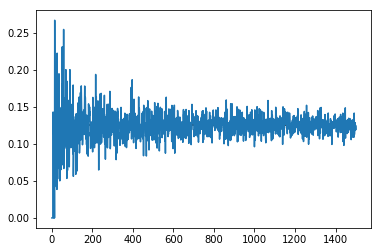

In [35]:
import random
import numpy as np
def bernoulli_trial(p):
    # simulate a Bernoulli trial with probability of getting success p
    # output 1 if Head, 0 if Tail
    r = random.random() # returns num [0, 1)
    if p-r > 0: return 1
    elif p-r <=0: return 0
    else: return None

# function for tossing the coin three times, and return the number of heads out of num
def coin_toss_trial(num):
    result = []
    for i in range(num):
        result.append(bernoulli_trial(0.5))
    return result

def coin_experiment(total_trials=1500, toss_num=3, num_heads_desired=3):

    x = np.zeros(total_trials)
    y = np.zeros(total_trials)
    for num_trial in range(1, total_trials+1):
        all_heads = 0
        for trial in range(1, num_trial+1):
            # toss the coin 3 times
            num_heads = sum(coin_toss_trial(toss_num))
            if num_heads == num_heads_desired:
                all_heads+=1
        x[num_trial-1] = num_trial
        y[num_trial-1] = Fraction(all_heads, num_trial)
    return x, y
x, y = coin_experiment()
plt.plot(x, y)
plt.hlines(Fraction(1, 8), 0, total_trials+1)
plt.show()

**You can observe that the probability is converging to the one point, between 0.10 ~ 0.15, which is about equal to 1/8**

<br>

Nooow finally getting to conditional, 
2. Given that the first toss was head, how should we compute the probability of 3 heads??
This will change the sample space that we should consider. Now we know that the 1st toss is head, therfore
> $\Omega = \{HHH, HHT, HTH, HTT\}$, and out of 4 outcomes, one is the desired. <br>
Now let $A$ be event that all 3 toss are head, and $B$ be first toss is head. Then
$$P(A|B) = \frac{1}{4}$$

In other words, you're really tossing the coin 2 times, and counting the event of getting 2 heads.
Let's graph it again



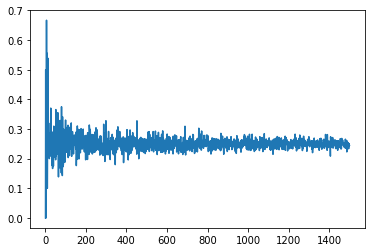

In [42]:
x, y = coin_experiment(1500, 2, 2) # do 1500 trials, toss 2 times each, and count 2Heads
plt.plot(x, y)
plt.hlines(Fraction(1, 4), 0, total_trials+1)
plt.show()

**Now you can see that it converges to about 0.25, equal to 1/4.**

<br>

### Defition of Conditional Probability

Let $A$ and $B$ event, then conditional probability of event $A$ occuring given information that $B$ occured, is

$$P(A|B) = \frac{P(A \cap B)}{P(B)}, \hspace{1cm} given P(B) \ne 0$$

This leads to another convenient rule which is...

### Multiplication Rule
$$ P(A \cap B) = P(A|B)\cdot P(B)$$

### Independence

2 or more events are independent, if knowledge of one event occured does not influence the probability of other event occuring. 

Intuitively, if 2 events are independent, these events do not influence each other.

This can be expressed as...
$$P(A|B) = P(A)$$, 

Knowledge of event $B$ does not influence on probability of $A$ occuring.

**Formally,**
$$P(A \cap B) = P(A) \cdot P(B)$$

